In [2]:
import pandas as pd 
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Data/kleine.csv')
df2 = pd.read_csv('Data/BeltersDans6-1.csv')

In [79]:
df = df[(df['PitchCall'] == 'StrikeCalled')]
df2 = df2[(df2['PitchCall'] == 'BallCalled')]

In [5]:
vert_strike_min, vert_strike_max = 1.5, 3.5  # Standard vertical strike zone
horz_strike_min, horz_strike_max = -1, 1

In [6]:
df['Vert Strike'] = (df['PlateLocHeight'].between(vert_strike_min, vert_strike_max)).astype(int)
df['Horz Strike'] = (df['PlateLocSide'].between(horz_strike_min, horz_strike_max)).astype(int) 
df2['Vert Strike'] = (df2['PlateLocHeight'].between(vert_strike_min, vert_strike_max)).astype(int)
df2['Horz Strike'] = (df2['PlateLocSide'].between(horz_strike_min, horz_strike_max)).astype(int) 

In [7]:
df2['In Strike Zone?'] = (df2['Vert Strike'] & df2['Horz Strike']).astype(int)
df['In Strike Zone?'] = (df['Vert Strike'] & df['Horz Strike']).astype(int)

In [8]:
df = df[df['In Strike Zone?'] == 0]
df2 = df2[df2['In Strike Zone?'] == 1]

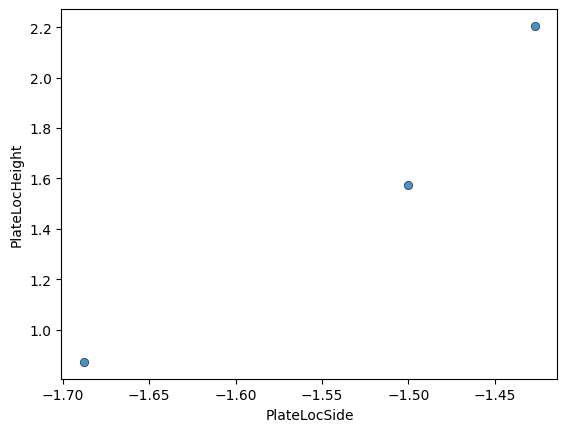

In [9]:
sns.scatterplot(x=df['PlateLocSide'], y=df['PlateLocHeight'],
                sizes=(50, 500),  # Adjust min and max bubble size
                ec='black',
                alpha=0.8,
                zorder=2)

# Add the strike zone rectangle
strike_zone = Rectangle((-1, 1.5), 2, 2.0, fill=False, edgecolor='black', linewidth=2, zorder=1)
plt.gca().add_patch(strike_zone)

# Show the plot
plt.show()

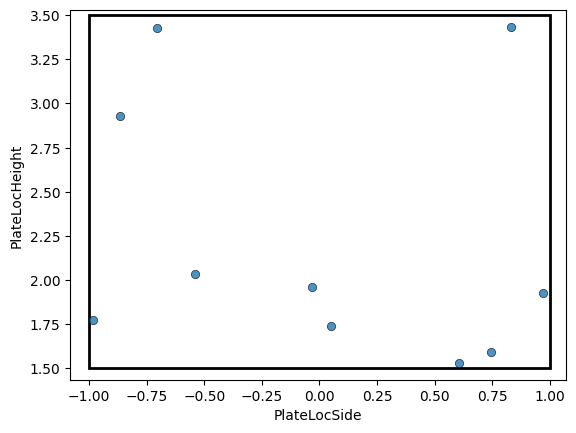

In [85]:
sns.scatterplot(x=df2['PlateLocSide'], y=df2['PlateLocHeight'],
                sizes=(50, 500),  # Adjust min and max bubble size
                ec='black',
                alpha=0.8,
                zorder=2)

# Add the strike zone rectangle
strike_zone = Rectangle((-1, 1.5), 2, 2.0, fill=False, edgecolor='black', linewidth=2, zorder=1)
plt.gca().add_patch(strike_zone)

# Show the plot
plt.show()